# Author : Vikas Agrawal

## Task 2 : Prediction using Unsupervised Machine Learning
## GRIP @ The Sparks Foundation

In [8]:
import pandas as pd
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Loading Dataset

In [9]:
iris = datasets.load_iris()
X,Y = iris.data,iris.target
x=pd.DataFrame(iris.data,columns=iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y=pd.DataFrame(iris.target,columns =['Species'])
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# Elbow method for optimal value of k

In [11]:
err = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x)
  err.append(kmeans.inertia_)

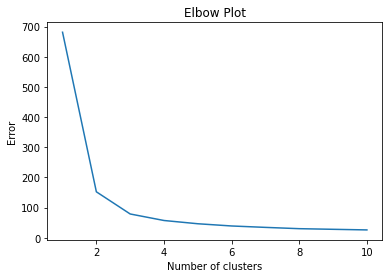

In [12]:
plt.plot(range(1,11),err)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

Here we can see, the elbow-like shape is formed at k=3 which is the optimum value.

# Model Training

In [13]:
K_model= KMeans(n_clusters=3)
pred = K_model.fit_predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [14]:
K_model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Visualizing the Model Cluster

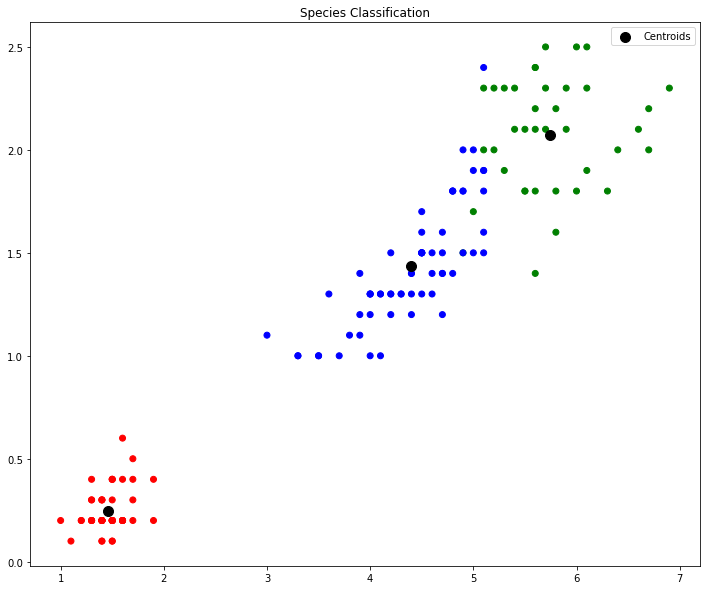

In [15]:
plt.figure(figsize=(12,10))
color = np.array(['red','blue','green'])
pred_y = np.choose(pred, [1, 0, 2]).astype(np.int64)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=color[pred_y])
plt.scatter(K_model.cluster_centers_[:, 2], K_model.cluster_centers_[:,3], s = 100, c = 'black', label = 'Centroids')
plt.title('Species Classification')
plt.legend()
plt.show()

# Calculating the Accuracy & Confusion Matrix

In [17]:
print("Accuracy", accuracy_score(pred_y,y))

Accuracy 0.8933333333333333


So here we have got the clusters for different species with 89.33% accuracy socre.

In [18]:
confusion_matrix(pred_y,y)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]])

## Conclusion
### I was  able to successfully carry-out prediction using Unsupervised Machine Learning task and was able to evaluate the model's clustering accuracy score.
# Thank You